In [1]:
# Importing requried libraries
import numpy as np
import pandas as pd
import json
import csv
import regex as re
import seaborn as sns
import os
import re
import string

In [2]:
# Setting directory structure
root_dir = 'C:\\Users\\yashd\\Desktop\\rethink-media\\quote-classification\\'
data_dir = 'Data\\cleaned_data\\'

In [3]:
%%time
# Importing cleaned sample data for EDA
os.chdir(root_dir)
GNI88_df_sample = pd.read_csv(root_dir + data_dir + 'GNI88_cleaned_sample.csv', low_memory = False)
GNI88_df = pd.read_csv(root_dir + data_dir + 'GNI88_cleaned_data.csv', low_memory = False)
GNI88_df.head()

Wall time: 1min 22s


,artdate,Article ID,Headline,Quote ID,Article Status,Article Position,Messages,Submessages,Quote Position,Legacy Quote Tag,...,Constituent Group,Media Name,Media Medium,Journalist Name,Constituent Author,Article Issues,Custom Group,Media Group,fulltext,source_name_cleaned
0,2018-02-05,3774467,Opinion: They Voted for Caps. Now They Want Mo...,7096188,Opinion,Neutral,OLD Spending,OLD Nukes Budget Campaign,Neutral,NaN,...,None (Legacy Other),Roll Call,Print,"Bell, Steve",NaN,NaN,Commentary,Capitol Hill Media,Opinion: They Voted for Caps. Now They Want Mo...,Steve Bell
1,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105520,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,None (Legacy Other),News Week,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,James Mattis
2,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105517,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,None (Legacy Other),News Week,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,James Mattis
3,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105518,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Positive,NaN,...,NaN,News Week,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,Leon E. Panetta
4,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105527,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,NaN,News Week,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,Chuck Hagel


In [4]:
# Dropping the row with 1 NaN value in QText and Opinion Articles
GNI88_df = GNI88_df[~GNI88_df['QText'].isna()]
GNI88_df = GNI88_df[GNI88_df['Article Status'] != 'Opinion']
GNI88_df

,artdate,Article ID,Headline,Quote ID,Article Status,Article Position,Messages,Submessages,Quote Position,Legacy Quote Tag,...,Constituent Group,Media Name,Media Medium,Journalist Name,Constituent Author,Article Issues,Custom Group,Media Group,fulltext,source_name_cleaned
1,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105520,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,None (Legacy Other),News Week,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,James Mattis
2,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105517,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,None (Legacy Other),News Week,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,James Mattis
3,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105518,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Positive,NaN,...,NaN,News Week,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,Leon E. Panetta
4,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105527,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,NaN,News Week,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,Chuck Hagel
5,2018-02-15,3777414,"For His Book 'Directorate S,' Journalist Steve...",7105525,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Positive,NaN,...,None (Legacy Other),NPR,NaN,"Kelly, Mary",NaN,NaN,NaN,NaN,"For His Book 'Directorate S,' Journalist Steve...",Steve Coll
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408198,2018-02-15,3777408,"No 'bloody nose' strategy for North Korea, say...",7105513,News,Positive,OLD Proliferation,OLD State Level Nuclear Programs,Positive,NaN,...,None (Legacy Other),Defense News,NaN,"Gould, Joe",NaN,NaN,NaN,NaN,"No 'bloody nose' strategy for North Korea, say...",Jeanne Shaheen
408199,2018-02-15,3777408,"No 'bloody nose' strategy for North Korea, say...",7105511,News,Positive,OLD Proliferation,OLD State Level Nuclear Programs,Positive,NaN,...,None (Legacy Other),Defense News,NaN,"Gould, Joe",NaN,NaN,NaN,NaN,"No 'bloody nose' strategy for North Korea, say...",Unnamed Trump White House Official
408200,2018-02-15,3777408,"No 'bloody nose' strategy for North Korea, say...",7105519,News,Positive,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,None (Legacy Other),Defense News,NaN,"Gould, Joe",NaN,NaN,NaN,NaN,"No 'bloody nose' strategy for North Korea, say...",Susan Thornton
408201,2018-02-15,3777408,"No 'bloody nose' strategy for North Korea, say...",7105510,News,Positive,OLD Proliferation,OLD State Level Nuclear Programs,Positive,NaN,...,None (Legacy Other),Defense News,NaN,"Gould, Joe",NaN,NaN,NaN,NaN,"No 'bloody nose' strategy for North Korea, say...",Unnamed Source


In [5]:
# lookup dictionary which can convert a speaker type to its classification group in constant time
source_to_group = {'Foreign Gov/Mil Official': "Foreign Government",
                   'Military': "Foreign Government", #added in manually
                   'EU Official' : "Foreign Government", #added in manually
                   'Former Russian Official' : "Foreign Government", #added in manually
                   'South Korean Official' : "Foreign Government", #added in manually
                   'Media/Journalist': "External Commentator",
                   'Analyst/Commentator': "External Commentator",
                   'Citizen': "External Commentator",
                   'Blogger': "External Commentator",
                   'Public Polling': "External Commentator",
                   'Partisans/Fmr. Politicians': "External Commentator",
                   'Nuke Organization': "Organization",
                   'International Orgs': "International",
                   'Non-Profit/NGO': "Organization",
                   'Think Tanks': "Organization",
                   'Nuke Organization - Other': "Organization",
                   'US Rep. & Staff': "US Federal Officials",
                   'US Senate & Staff': "US Federal Officials",
                   'Federal Official': "US Federal Officials",
                   'State/Local Official': "US Federal Officials",
                   'Judicial Official': "US Federal Officials", 
                   'Former Admin. Officials': "US Federal Officials", 
                   'Regulator': "International",
                   'US Military': "US Defense",
                   'Defense Forces': "US Defense",
                   'Defense': "US Defense",
                   'US Police': "US Defense",
                   'Deputy': "US Defense",
                   'Academic': "Academic",
                   'Nuke Organization - Academic': "Organization",
                   'Nuclear Scientist': "Academic",
                   'Other': "Other",
                   'Chairman': "Other",
                   'Terrorist/Extremist': "Other",
                   'Corporate Official': "Other",
                   'Information minister': "Other",
                   'Religious/Clerical': "Other",
                   'Attorney': "Other", 
                   'Ambassador': "Other",
                   'Former Ambassador' : "Other",
                   'Nuclear Official': "Other",
                   'Activist' : "Other" #added in manually
                  }

In [6]:
# credit: Daniel
def assign_source_to_group(source_type):
  """ 
  Inputs:
     - source_type: str, source type from quote datafame
     Outputs:
     - str of the bigger speaker category to which source_type belongs
  """
# Everything not covered in the keys falls under 'Other'
  if type(source_type) != str or source_type not in source_to_group.keys():
    return "Other"
  else:
    return source_to_group[source_type]

In [7]:
# credit: Tiffany
GNI88_df["Speaker Group"] = GNI88_df.apply(lambda row: assign_source_to_group(row["Source Type"]),axis=1)

In [8]:
import requests
url ="https://raw.githubusercontent.com/hyperreality/American-British-English-Translator/master/data/british_spellings.json"
british_to_american_dict = requests.get(url).json()
british_words = list(british_to_american_dict.keys())
#remove_words = ['buses', 'disc', 'axe']
#[british_words.remove(w) for w in remove_words]
len(british_words)

1730

In [9]:
# Counts occurrences of word 'nuke' in a particular text using regex
def count_nuke(text):
    if type(text) == str:
        return len(re.findall("(nukes?[^\w])|(nukes?[.!?])", text))
    else:
        return 0

# Indicates if the word 'nuke' was used in the text using regex
def has_nuke(text):
    if type(text) == str:
        return int(len(re.findall("(nukes?[^\w])|(nukes?[.!?])", text)) > 0)
    else:
        return 0

In [10]:
%%time
GNI88_df['Count Nuke'] = GNI88_df['QText'].apply(count_nuke)
GNI88_df['Has Nuke'] = GNI88_df['QText'].apply(has_nuke)

Wall time: 11.3 s


In [11]:
GNI88_df['Count Nuke'].value_counts()

0    360371
1      1097
2        68
3         8
4         1
Name: Count Nuke, dtype: int64

In [12]:
GNI88_df['Has Nuke'].value_counts()

0    360371
1      1174
Name: Has Nuke, dtype: int64

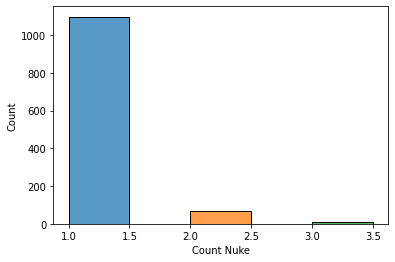

In [13]:
for name, subdf in GNI88_df.groupby('Count Nuke'):
    if name != 0:
        sns.histplot(data = subdf, x = 'Count Nuke', bins = np.arange(1,4,0.5));

<AxesSubplot:xlabel='index'>

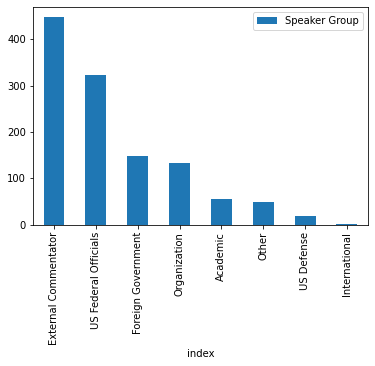

In [14]:
GNI88_df[GNI88_df['Count Nuke'] > 0]['Speaker Group'].value_counts().reset_index().plot.bar(x='index', y='Speaker Group')

In [15]:
def count_british(text):
    count = 0
    if type(text) == str:
        for i in british_words:
            count += text.count(i + " ")
            count += text.count(i + ".")
            count += text.count(i + "?")
            count += text.count(i + ",")
    return count

In [16]:
%time
GNI88_df['Count British'] = GNI88_df['QText'].apply(count_british)

Wall time: 0 ns


In [21]:
GNI88_df[GNI88_df['Count British'] > 0]['Speaker Group'].value_counts()

Foreign Government      3986
US Federal Officials    1342
External Commentator     982
International            530
Other                    466
Organization             459
Academic                 137
US Defense                77
Name: Speaker Group, dtype: int64

<AxesSubplot:xlabel='index'>

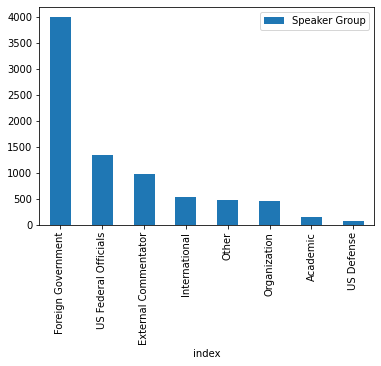

In [17]:
GNI88_df[GNI88_df['Count British'] > 0]['Speaker Group'].value_counts().reset_index().plot.bar(x='index', y='Speaker Group')

In [18]:
british_us_federal = GNI88_df[(GNI88_df['Count British'] > 0) & (GNI88_df['Speaker Group'] == 'US Federal Officials')]

In [23]:
# With new method of counting
british_words = list(british_to_american_dict.keys())
for i in british_words:
    for j in british_us_federal['QText']:
        if i in j:
            print(i)

aluminium
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analysing
apologise
arbour
arbours
authorise
authorise
authorised
authorised
axe
axe
axe
bedevilled
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviours
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
buses
b

In [60]:
# without any changes to british american dict
for i in british_to_american_dict.keys():
    for j in british_us_federal['QText']:
        if i in j:
            if (i == 'disc'):
                print(j)
            print(i)

aluminium
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyse
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analyses
analysing
apologise
appal
appal
appal
appal
appal
appal
appal
appal
appal
appal
appal
appal
appal
appal
appal
arbour
arbours
authorise
authorise
authorised
authorised
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
axe
bedevilled
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
behaviour
b

### Removing some common words from the list of british words and exploring how the resulting graph changes

In [24]:
remove_words = ['buses', 'disc', 'dialogue','gramme']
british_words_edited = list(british_to_american_dict.keys())
[british_words_edited.remove(w) for w in remove_words]

[None, None, None, None]

In [25]:
def count_british_edited(text):
    count = 0
    if type(text) == str:
        for i in british_words_edited:
            count += text.count(i + " ")
            count += text.count(i + ".")
            count += text.count(i + "?")
            count += text.count(i + ",")
    return count

In [26]:
%time
GNI88_df['Count British Edited'] = GNI88_df['QText'].apply(count_british_edited)

Wall time: 0 ns


In [27]:
GNI88_df[GNI88_df['Count British Edited'] > 0]['Speaker Group'].value_counts()

Foreign Government      2657
US Federal Officials     728
External Commentator     695
Other                    388
International            377
Organization             327
Academic                  75
US Defense                58
Name: Speaker Group, dtype: int64

<AxesSubplot:xlabel='index'>

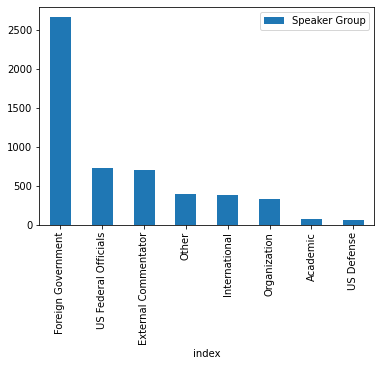

In [28]:
GNI88_df[GNI88_df['Count British Edited'] > 0]['Speaker Group'].value_counts().reset_index().plot.bar(x='index', y='Speaker Group')